<div style="font-weight: bold" align="center">
    <div style="font-size: xx-large; color:#3d6f91">Computación Numérica</div><br>
    <div style="font-size: x-large; color:gray">Práctica 1</div><br>
    <div style="font-size: large; color: #5D8AA8">Óscar Gómez Borzdynski y Alejandro Cabana Suárez</div><br></div><hr>
</div>

In [5]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mostrar o esconder código"></form>''')

In [1]:
import matplotlib.pyplot as plt
import sys
import numpy as np


In [2]:
%%html
<style>
    h1, h2, h3 {color: #3d6f91;}
    b {color: #5D8AA8;}
</style>

## Cuestiones teóricas

<b>Si una función es periódica ¿Puede estar bien interpolada por un polinomio de Hermite?</b>

No, ningún polinomio puede aproximar bien una función periódica ya que tiene finitas derivadas no nulas y en los extremos es siempre creciente o siempre decreciente.

<b>En qué condiciones pensáis que un polinomio de Hermite puede interpolar bien una función periódica.</b>

<b>¿Qué método pensáis que podría ser mejor para implementar funciones periódicas?</b>

Pensamos que la interpolación por series de Fourier, por estar formadas por funciones periódicas será la mejor forma de aproximar funciones periódicas.

## Ejercicio 1

In [3]:
def f(x):
    return np.cos(x)**2 - np.sin(x)

<b>¿Es una función periódica?</b>

Sí, pues está compuesta por sumas y productos de funciones periódicas.

In [4]:
values = [i*np.pi/32 for i in range(641)]
fun_values = f(values)

Text(0, 0.5, 'f(x)')

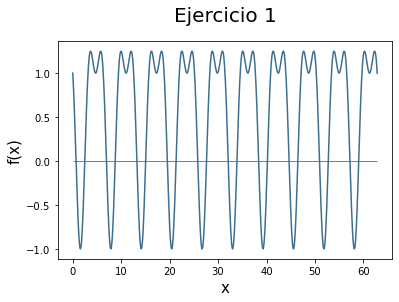

In [5]:
plt.plot(values, fun_values, color='#3d6f91')
plt.title("Ejercicio 1", fontsize=20, pad=20)
plt.hlines(y=0, xmin = min(values), xmax = max(values), color='k', lw=0.5)
plt.xlabel('x', fontsize=15)
plt.ylabel('f(x)', fontsize=15)

## Ejercicio 2

In [25]:
def coefs(f, x):
    M = np.ones((641,641)) # Comenzamos con una matriz de unos
    M = np.exp(M*(1j/10)*np.repeat([range(641)], 641, axis=0).T*x) # Multiplicamos por e**(i(n/10)*x_k)
    F = f(x)
    C = (M @ F) * (np.pi/32) # f(x) * M
    return C

In [26]:
C = coefs(f,values)

In [27]:
len(C)

641

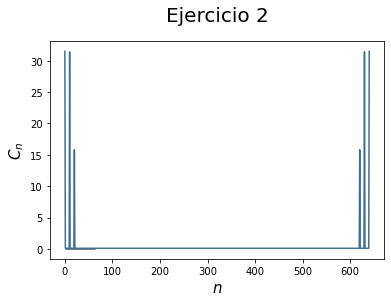

In [28]:
plt.plot(np.absolute(C), color='#3d6f91')
plt.title("Ejercicio 2", fontsize=20, pad=20)
plt.hlines(y=0, xmin = min(values), xmax = max(values), color='k', lw=0.5)
plt.xlabel('$n$', fontsize=15)
_ = plt.ylabel('$C_n$', fontsize=15)

## Ejercicio 3

Acordarse que en el enunciado hay una errata y hay que multiplicar la f final por $\frac{32}{\pi}$

In [29]:
def eval(coefs, x):
    M = np.ones(641)
    M = np.exp(M*(-1j/10)*np.array(range(641))*x)
    F = (M @ coefs)*(32/np.pi) / 640
    return F

In [33]:
eval(C, np.pi)

(1.5015624999999344-8.220924169538584e-14j)

In [187]:
f(0)

1.0

In [31]:
Coeficientes = [np.sum([f(values[i]) * np.exp(complex(0,1)*n*values[i]/10) for i in range(641)]) * np.pi/32 for n in range(641)]

In [32]:
x = np.pi
np.sum([Coeficientes[n]*np.exp(-complex(0,1)*n*x/10) for n in range(641)])*(32/np.pi)/640

(1.5015624999999364+2.0920981904737797e-15j)

In [190]:
f(np.pi)

0.9999999999999999

/home/oscar/anaconda3/envs/MUCD-CN/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'f(x)')

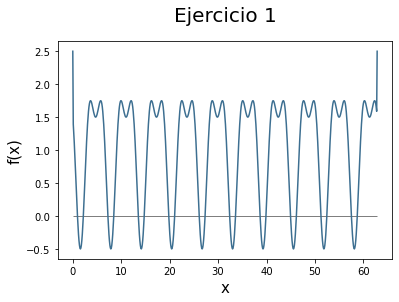

In [30]:
plt.plot(values, [eval(C,val) for val in values], color='#3d6f91')
plt.title("Ejercicio 1", fontsize=20, pad=20)
plt.hlines(y=0, xmin = min(values), xmax = max(values), color='k', lw=0.5)
plt.xlabel('x', fontsize=15)
plt.ylabel('f(x)', fontsize=15)

In [21]:
len(C)

640